Cross-Validation and scoring methods


In [8]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris= load_iris()
X, y = iris.data, iris.target
classifier = KNeighborsClassifier()

The labels in iris are sorted, which means that if we split the data, the first fold will only have the label 0 in it, while the last one will only have the label 2:

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

To avoid this problem in evaluation, we first shuffle our data:


In [10]:
import numpy as np
rng = np.random.RandomState(0)

permutation = rng.permutation(len(X))
X, y = X[permutation], y[permutation]
print(y)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0
 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1
 2 0]


Now implementing cross-validation is easy:

In [14]:
k = 5
n_samples = len(X)
fold_size = n_samples // k
scores =[]
masks =[]
for fold in range(k):
  #generate a boolean mask for the test set in this fold
  test_mask = np.zeros(n_samples, dtype = (bool))
  test_mask[fold * fold_size : (fold + 1) * fold_size] = True
  #srote the mask for visualization
  masks.append(test_mask)
  #creating training and test sets using this mask
  X_test, y_test = X[test_mask], y[test_mask]
  X_train, y_train = X[~test_mask], y[~test_mask]
  #fit the classifier
  classifier.fit(X_train, y_train)
  #compute the score and recorde it
  scores.append(classifier.score(X_test, y_test))


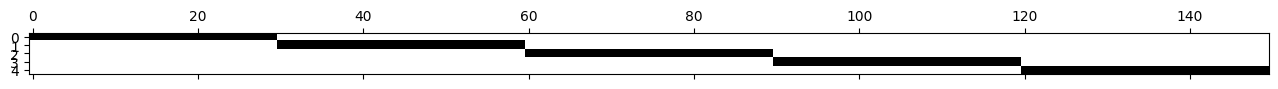

In [16]:
import matplotlib.pyplot as plt
%matplotlib  inline
plt.matshow(masks, cmap = "gray_r")


In [17]:
print(scores)
print(np.mean(scores))

[0.9666666666666667, 0.9, 1.0, 1.0, 0.9333333333333333]
0.96


As you can see, there is a rather wide spectrum of scores from 90% correct to 100% correct. If we only did a single split, we might have gotten either answer.

As cross-validation is such a common pattern in machine learning, there are functions to do the above for you with much more flexibility and less code. The sklearn.model_selection module has all functions related to cross validation. There easiest function is cross_val_score which takes an estimator and a dataset, and will do all of the splitting for you

In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y)
print(scores)
print(np.mean(scores))

[1.         0.93333333 1.         1.         0.93333333]
0.9733333333333334


As you can see, the function uses three folds by default. You can change the number of folds using the cv argument:

In [20]:
cross_val_score(classifier, X, y, cv=5)

array([1.        , 0.93333333, 1.        , 1.        , 0.93333333])

There are also helper objects in the cross-validation module that will generate indices for you for all kinds of different cross-validation methods, including k-fold:

In [21]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit

By default, cross_val_score will use StratifiedKFold for classification, which ensures that the class proportions in the dataset are reflected in each fold. If you have a binary classification dataset with 90% of data point belonging to class 0, that would mean that in each fold, 90% of datapoints would belong to class 0. If you would just use KFold cross-validation, it is likely that you would generate a split that only contains class 0. It is generally a good idea to use StratifiedKFold whenever you do classification.

StratifiedKFold would also remove our need to shuffle iris. Let's see what kinds of folds it generates on the unshuffled iris dataset. Each cross-validation class is a generator of sets of training and test indices:

In [22]:
cv = StratifiedKFold(n_splits=5)
for train, test in cv.split(iris.data, iris.target):
  print(test)

[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
[ 10  11  12  13  14  15  16  17  18  19  60  61  62  63  64  65  66  67
  68  69 110 111 112 113 114 115 116 117 118 119]
[ 20  21  22  23  24  25  26  27  28  29  70  71  72  73  74  75  76  77
  78  79 120 121 122 123 124 125 126 127 128 129]
[ 30  31  32  33  34  35  36  37  38  39  80  81  82  83  84  85  86  87
  88  89 130 131 132 133 134 135 136 137 138 139]
[ 40  41  42  43  44  45  46  47  48  49  90  91  92  93  94  95  96  97
  98  99 140 141 142 143 144 145 146 147 148 149]


As you can see, there are a couple of samples from the beginning, then from the middle, and then from the end, in each of the folds. This way, the class ratios are preserved. Let's visualize the split:

In [32]:
def plot_cv(cv, features,labels):
  masks=[]
  for train, test in cv.split(features, labels):
    mask = np.zeros(len(labels), dtype="bool")
    mask[test]=1
    masks.append(mask)

  plt.matshow(masks, cmap="gray_r")


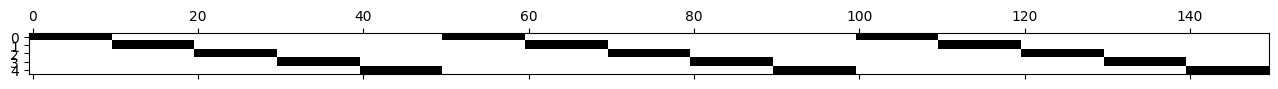

In [33]:
plot_cv(StratifiedKFold(n_splits=5), iris.data, iris.target)

For comparison, again the standard KFold, that ignores the labels:

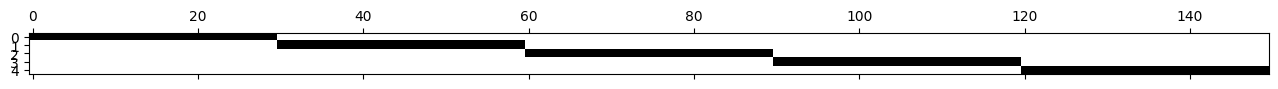

In [34]:
plot_cv(KFold(n_splits=5), iris.data, iris.target)

Keep in mind that increasing the number of folds will give you a larger training dataset, but will lead to more repetitions, and therefore a slower evaluation:

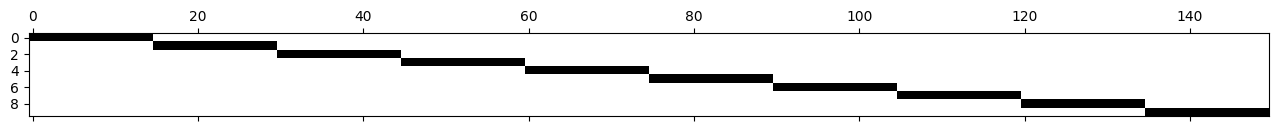

In [35]:
plot_cv(KFold(n_splits=10), iris.data, iris.target)

Another helpful cross-validation generator is ShuffleSplit. This generator simply splits of a random portion of the data repeatedly. This allows the user to specify the number of repetitions and the training set size independently:

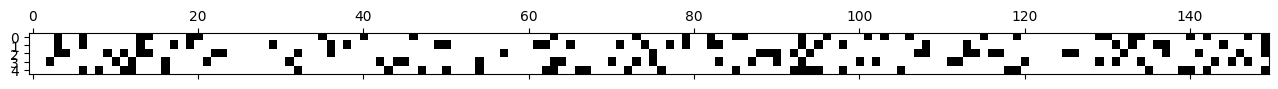

In [36]:
plot_cv(ShuffleSplit(n_splits=5, test_size=.2), iris.data, iris.target)

If you want a more robust estimate, you can just increase the number of splits:

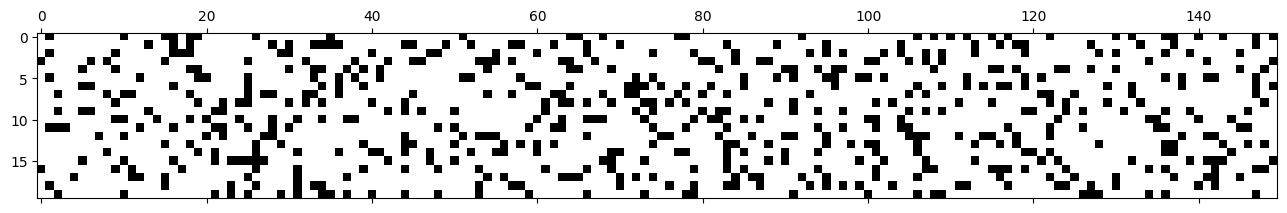

In [37]:
plot_cv(ShuffleSplit(n_splits=20, test_size=.2), iris.data, iris.target)

You can use all of these cross-validation generators with the cross_val_score method:

In [38]:
cv=ShuffleSplit(n_splits=5, test_size=.2)
cross_val_score(classifier, X, y, cv=cv)

array([1.        , 0.96666667, 0.93333333, 0.96666667, 0.96666667])

Perform three-fold cross-validation using the ``KFold`` class on the iris dataset without shuffling the data. Can you explain the result?